## Learning Spanish verbs and prepositions

### Problem:

When learning Spanish, as with many languages, it can be difficult to remember which is the correct 
preposition to use with a verb. 

e.g. In the following sentence I might mistakingly say 'enamorado en', instead of 'enamorado de'
<br><em>Ernesto se ha enamorado <strong>de</strong> su vecina</em>

Sometimes in Spanish there is no preposition after a verb, where in English there would be.
<br>e.g. Busco mi cartera. I'm looking <strong>for</strong> my wallet.

The only way to get this right is to learn by heart which prepositions go with which verbs and then practice them in context... a lot!

### Aim of this project:

To facilitate learning Spanish verbs + prepositions by finding a large number of example sentences and turning them into <a href="https://apps.ankiweb.net/docs/manual.html#_introduction">Anki flashcards</a> with <a href="https://apps.ankiweb.net/docs/manual.html#cloze-deletion">cloze deletions</a> for practice.<br>



### The end result is a deck of Anki flashcards

The resulting deck, verbs_with_prepositions.apkg, can be found on the github repository and I will also add it to ankiweb.

Anki is a flashcard app that uses active recall testing and spaced repetition to help you learn almost anything very efficiently. 

The front of the flash card displays a sentence with target verb + preposition to be learned the preposition removed and replaced by a 'cloze deletion'.


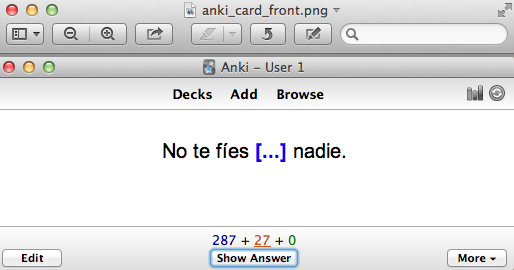


You then have to guess the correct preposition (say it allowed or in your head - you don't type anything into Anki)

The back of the card is then displayed showing the full sentence and the English translation


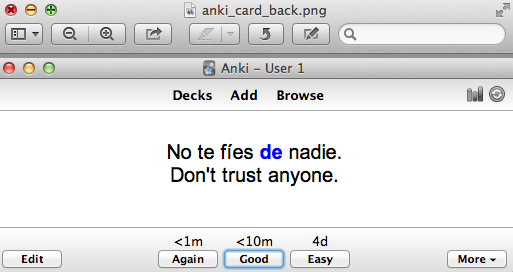


You are then required to say if you got the answer wrong (again), if you got it correct but it wasn't super easy (good), or if you got it correct and it was easy. How soon you get tested on the card again depends on your response. This is a powerful learning method called <a href="https://en.wikipedia.org/wiki/Spaced_repetition"> spaced repetition learning.</a>

### Process:

1. Get a database of Spanish sentences with English translations from tatoeba.org
2. Get a list of verbs + prepositions to learn from <a href="https://www.profedeele.es/activities/grammar/spanish-verbs-with-prepositions-explanation-and-activity/?lang=en">here</a>
3. Get all conjugated forms of each verb by webscraping form an <a href=" http://www.spanishdict.com/conjugate">online conjugation website</a>
4. Find sentences in the database containing examples of each verb + preposition combination. The requires regular expression searching to allow the verb to appear in any conjugated form (there are over 140 forms for each verb)
5. Find the English translations for each Spanish sentence 
6. Select a sample of example sentences for each each verb + preposition combination using stratified sampling
7. Write these samples to a tab seperated file with anki formatting for <a href="https://apps.ankiweb.net/docs/manual.html#cloze-deletion">cloze deletions</a>
8. Import the cards into Anki




### Resources

Database of sentences and translations:
https://tatoeba.org/eng

Online verb conjugator:
http://www.spanishdict.com/conjugate/caerse

#### Websites about verbs and prepositions in Spanish:

Lesson about verbs + prepositions
http://laspreposiciones.com/verbs-and-prepositions.html

List of over 100 verbs plus prepositions
https://www.profedeele.es/activities/grammar/spanish-verbs-with-prepositions-explanation-and-activity/?lang=en


### problems to fix:
    
Solve problems with webscraping with non ascii character ñ e.g. verb soñar

Get present participles which weren't available from webscraping

Avoid false matches for verbs + prepositions
<br> e.g. The sentence:
<br><em>El aviso de trabajo solicitaba específicamente a una dama.</em>
<br>is not an example of a avisar + a, because 'aviso' in this context is a noun, not a verb, although it is indistinguishable from the first person singular present simple conjugation of avisar.


### Features to add/changes to be made/further work

Add verbs which are not followed by preposition in Spanish but are in English

Try doing this with much larger sentence database/text corpus e.g. opensubtitles.org

Get bigger list of verbs plus prepositions:
e.g. https://ankiweb.net/shared/info/1879270437

Generate my own list of verbs + prepositions by analysing many sentences and finding when a verb is followed by a preposition


### Getting a database of example sentences:

To get my example sentences I'm using Tatoeba, a open collection of sentences and translations in many languages.
See: https://tatoeba.org/eng/

Another possibility to try is opensubtitles.org


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load in the Tatoeba database  into pandas DataFrame
# Note: file is actually tab seperated, although named .csv
# I haven't uploaded this file to github because it is very large, you will need to download it from:
# https://tatoeba.org/eng/downloads
df = pd.read_csv("sentences_detailed.csv",sep="\t",index_col=0,header=None)


# This produced a FutureWarning. I'm not sure why this warning occured. Everything has loaded correctly now 
# but the warning means that if numpy or python is upgraded there could be issues 
# (This is unlikely to cause problems in my opinion)

/Users/pv7409/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Each row consists of a unique id (on the index), the language, the sentence itself, the user who uploaded 
# the sentence and the time and data.

# Look at a random sample of entries
df.sample(10)

,1,2,3,4,5
0,,,,,
2345682,deu,Welche Oberschule hast du besucht?,Pfirsichbaeumchen,2013-03-29 15:27:19,2013-03-29 15:27:19
956820,pol,"Jeśli pan pozwoli, przeszukamy pański bagaż.",zipangu,2011-06-25 02:31:09,2011-06-25 02:31:09
4992498,fin,"Tomi teeskenteli sitä, että hän oli Marin ystävä.",tadaa25,2016-03-20 08:00:52,2016-03-20 08:00:52
4359218,hun,A garázs üres volt.,bandeirante,2015-07-11 09:40:53,2015-07-11 09:40:53
375514,ara,مع السلامة!,saeb,2010-04-04 15:56:34,2010-09-13 03:24:52
3059990,deu,Ich soll am Montag nach Boston fahren.,thomasvw,2014-02-21 15:51:33,2014-02-21 15:51:33
1118865,eng,She likes birdwatching.,Scriptor,2011-09-21 06:16:17,2013-08-27 08:30:46
6565182,rus,"Интересно, почему Том не пришёл к Мэри на вече...",marafon,2017-12-21 15:44:38,2017-12-21 15:44:38
2482459,fra,J'adore être seul.,sacredceltic,2013-06-06 16:31:34,2013-06-06 16:31:34


In [4]:
# Extract the English and Spanish sentences and delete columns I'm not interested in

english = df.loc[df[1] == 'eng'].drop([1,3,4,5],axis=1)
spanish = df.loc[df[1] == 'spa'].drop([1,3,4,5],axis=1)

# Rename the columns to something meaningful
english.columns = ["phrase"]
spanish.columns = ["phrase"]

In [5]:
# Each sentence in the database has a specific id 
# Translations of the same sentence each have a unique id for each languages

# Here I am creating dictionary 'links' linking the sentence ids with the ids of
# the ids of their translations in all other languages

links = {}
with open("links.csv") as f:
    for i, line in enumerate(f):
        words = line.split()
        a = int(words[0])
        b = int(words[1])
        if a in links:
            links[a].append(b)
        else:
            links[a] = [b]

### Get a list of verbs + prepositions to search the database for

In [6]:
# Read in list of verbs and the propositions that go with them
# list from https://www.profedeele.es/activities/grammar/spanish-verbs-with-prepositions-explanation-and-activity/?lang=en

verbs_preps = pd.read_csv("verbs_preps.txt",sep="\t",header=None)                       

In [7]:
# Remove verbs with ñ because thes non ascii characters have been causing problems with webscraping
# Try to resolve this!
verbs_preps = verbs_preps.loc[~verbs_preps[0].str.contains("ñ")]

# Reindex after deleting rows
verbs_preps.index = range(0,len(verbs_preps))

# Make everything lower case
verbs_preps.iloc[:,0] = verbs_preps.iloc[:,0].str.lower().str.strip()


### Get all conjugated forms of every verb by webscraping a conjugation site

In [8]:
# Import beautiful soup for webscraping

import bs4 as bs
import urllib.request

In [9]:
# Create a dictionary where the key is the infinitive of each verb
# and the values are all its conjugated forms.
# This will be used to search for sentences containing any conjugated form of a verb.

conj_dict = {}
no_presPar = []
for verb, prep in verbs_preps[[0,1]].values:

    # create a temporary list to hold all conjugated verb forms for current verb
    mylist = []

    # add infinitive
    mylist.append(verb)
    
    # Get all the conjugated forms of the verb by scraping a conjugation website 
    # using beautiful soup web scraping library
    sauce = urllib.request.urlopen("http://www.spanishdict.com/conjugate/{}".format(verb)).read()
    soup = bs.BeautifulSoup(sauce,'lxml')
    presParticiple = None
    
    # All verb conjugations are of html class "vtable-word-text"
    for i in soup.findAll(all, class_="vtable-word-text"):
        mylist.append(i.text)

    # get present participle if available
    for x in mylist:
        if x[-3:] == "ndo":
            presParticiple = x.split()[-1]                    
            break

    # add the verb forms with reflexive pronoun at the end of the verb  
    # in infinitive and gerund form for reflexive verbs only
    if verb[-3:] == "rse":
        for ending in ("me","te","se","nos","os"):
            mylist.append(verb[:-2]+ending)
            if presParticiple is not None:
                mylist.append(presParticiple[:-2]+ending)

    # Make a note of verbs for which the present participle wasn't available            
    if presParticiple is None:
        no_presPar.append(verb)

    # Add dictionary entry for current verb   
    conj_dict[verb] = mylist
    

In [10]:
# The following verbs didn't have entries for the gerund "ando/iendo" conjugations
# These could be added manually or from another source - currently not a priority

no_presPar

['arrepentirse',
 'atreverse',
 'despreocuparse',
 'desvivirse',
 'diplomarse',
 'entrometerse',
 'fugarse',
 'jactarse',
 'obstinarse',
 'quejarse',
 'rebelarse',
 'renunciar',
 'vanagloriarse']

In [11]:
# Writing dictionary to tab seperated file so I don't need to repeat webscraping in future
dict_series = pd.Series(conj_dict)
dict_series.to_csv("verb_conj_dict.tsv",sep="\t")

In [12]:
# Cleaning up dictionary keys (removing whitespace)
del_list = []
for key in conj_dict.keys():
    if " " in key:
        del_list.append(key)
        conj_dict[key.strip()] = conj_dict[key]

for key in del_list:
    del conj_dict[key]
        

### Find example sentences for each verb + preposition combination in our sentence database

In [13]:
# This will be our output dataframe
df_out = None

# Loop over all verb + preposition combinations
for verb, prep in verbs_preps[[0,1]].values:
    
    # Create a regular expression 'verbs' that will match any conjugated form of the current verb
    verbs = '|'.join(conj_dict[verb])

    # Find sentences with the verb + preposition and create a new DataFrame containing the matches
    # Note: the prepositions "a" and "de" when followed by "el", they combine with "el"
    #       to form "al" and "del", so we need to account for this in our regex
    tmpa = (spanish.loc[ spanish.loc[:,"phrase"]
                        .str.lower().str.contains(" (?:{}) (?:{} |{}l )"
                        .format(verbs,prep,prep))].copy()
           )
    
    tmpa['verb_match'] =  tmpa.loc[:,"phrase"].str.lower().str.extract(" ({}) ({} |{}l )".format(verbs,prep,prep))[0]
    tmpa['prep_match'] =  tmpa.loc[:,"phrase"].str.lower().str.extract(" ({}) ({} |{}l )".format(verbs,prep,prep))[1]
    tmpa['verb_prep'] = verb + " " + prep

    # If first verb set dataframe to equal our temporary frame, else append our temporary frame to the output frame
    if df_out is None:
        df_out = tmpa
    else:
        df_out = df_out.append(tmpa)
    
    


### Notes on the resulting example sentences

We have a total of 5719 output sentences

<br>There are examples for 88 verb + preposition combinations, while there should be 97. This means that there were no examples in the database found for 11 verb + preposition combinations (see below for which ones).

Some verb + prep combinations had many examples (e.g. the most common, tratar de, had 508 examples)

18 verb + prep combinations had fewer than 5 examples

### Conclusion: I need to use a bigger sentense database to get enough examples for each case

In [14]:
df_out['verb_prep'].describe()

count          5719
unique           88
top       tratar de
freq            508
Name: verb_prep, dtype: object

In [15]:
df_out['verb_prep'].value_counts().describe()

count     88.000000
mean      64.988636
std      104.682167
min        1.000000
25%        5.750000
50%       24.000000
75%       72.250000
max      508.000000
Name: verb_prep, dtype: float64

In [16]:
df_out['verb_prep'].value_counts().head()

tratar de     508
jugar a       477
hablar de     407
pensar en     384
confiar en    302
Name: verb_prep, dtype: int64

In [128]:
# 18 verb and preposition combinations had between 1 and 5 examples
df_out['verb_prep'].value_counts().loc[df_out['verb_prep'].value_counts() < 5].count()

18

In [37]:
# There were no examples in the database of the following verb + preposition combinations:
for i in (verbs_preps[0] + " " + verbs_preps[1]):
    if i not in (df_out['verb_prep'].unique()):
        print(i)

desdecirse por
desligarse de
desposeer de
despreocuparse de
desvivirse por
diplomarse en
incomodarse con
obstinarse en
preferir a
rebelarse contra
reconciliarse con
vanagloriarse de


### Get English translations for our sentences

In [18]:
# The English translations of each sentence are searched for by looking up the sentence id in the
# links dictionary and then seeing if any of the sentence ids in the values of the dictionary
# entries correspond to English sentences.
# Note: Not all sentences have English translations

df_out['eng'] = np.nan
for row in df_out.index:
    if links.get(row):
        for i in links[row]:
            if i in english.index:
                df_out.loc[row,'eng'] = english.loc[i,"phrase"]

### Now to select some sentences to make Anki cards with

We want to do stratified random sampling i.e. take 5 cards from each group verb + preposition combination 
<br>Take cards with English translations first
<br>If there are not enough cards with English translations, take all English sentences
first and then sentences without English translations to bring the total to 5.

Note: with current sentence database, some verb + prep combinations have less than 5 total sentences

In [123]:
# This will be the output dataframe
anki = None

# Loop over each verb + preposition pair
for verb_prep in df_out['verb_prep'].unique():

    # Find examples with and without English translations
    with_english = df_out.loc[(df_out["verb_prep"] == verb_prep) & (df_out['eng'].notnull())].copy()
    without_english = df_out.loc[(df_out["verb_prep"] == verb_prep) & (df_out['eng'].isnull())].copy()
    with_english_count = len(with_english)
    without_english_count = len(without_english)
    verb_prep_sel = df_out.loc[(df_out["verb_prep"] == verb_prep)].copy()
    
    # If there are enough English examples, just pick 5 randomly
    if with_english_count >= 5:
        mysample = with_english.sample(5,random_state=1)
    
    # If there are fewer than 5 examples with English translation, pick those first (if any) then fill up
    # the rest with examples without English translations
    elif 0 < with_english_count < 5:
        mysample = with_english.copy()
        
        if with_english_count + without_english_count >= 5:
            mysample.append(verb_prep_sel.sample(5 - with_english_count,random_state=1))
        else:
            mysample.append(without_english[:5 - with_english_count])
    else:
        mysample = without_english.iloc[:5].copy()

    # Create a new columns called 'cloze'. This contains a string in a format that Anki can 
    # read and create flashcards with
    for i in mysample.index:
        mysample.loc[i,'cloze'] = (mysample.loc[i,'phrase']
                              .replace(mysample.loc[i,'verb_match']+" "+
                                        mysample.loc[i,'prep_match'],
                                        mysample.loc[i,'verb_match']+" "+  
                                        "{{c1::" + mysample.loc[i,'prep_match'] + "::..." "}} ") + "\t "
                              )

    # If first verb, assign the sample rows to the anki dataframe, otherwise append to it
    if anki is None:
        anki = mysample
    else:
        anki = anki.append(mysample)


# Write out the cloze deletion string and the English translation to a tab seperated value file
anki[['cloze','eng']].to_csv("for_anki.tsv",index=False,sep="\t",header=None)

for_anki.tsv can now be imported into anki <a href="https://apps.ankiweb.net/docs/manual.html#importing">here's how</a>
<br>Make sure you import the cards as cloze deletion cards, with the first field assigned to the 

In [124]:
anki[['cloze','eng']].head()

,cloze,eng
854901,Él me advirtió {{c1::de ::...}} que no cruzara...,He warned me against crossing the road at that...
854903,"En ese momento, él me advirtió {{c1::de ::...}...",He warned me against crossing the road at that...
1642418,Los médicos nos advirtieron {{c1::de ::...}} u...,Doctors warn us of a possible danger.
2963451,Tom abusa {{c1::de ::...}} su autoridad.\t,Tom abuses his authority.
1599334,Los países grandes no deberían abusar {{c1::de...,Large countries shouldn't interfere with small...
